# A. Weight Analysis Project

The Task: Determining the factors that play a role in predicting an indivitual's weight.

In [1]:
%%html
<img src="pictures/weight.jpg", width=500, height=500>

The data used for this project is taken from the National Health and Nutrition Examination Survey of individuals from the United States of America. The following information was collected from participants in this survey:

1. Weight - in kilograms - Numerical
2. Age - in years - Numerical
3. Height - in centimetres - Numerical
4. Income Ratio: Ratio of Participant Income to baseline poverty level income - Numerical
5. Sex - Male or Female - Categorical
6. Activity - Number of dats in the last week including more than 60 minutes of excercise - Numerical

Investigation: The end point of this project is to build a regressional model to test whether the chosen features effectively predict an indivituals weight or not. In order build up to this, some preliminary data cleaning and analysis needs to be conducted in order to deal with missing data and exclude any covariates that would not be as relevant to the model.

# B. Data Inspection and Cleaning

First we must import the necessary packages for dealing with the datasets:
- pandas
- matplotlib
- seaborn

In [2]:
#Importing packages:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

The dataset for this project exists as the file excelica.csv. I will load this file and use the .head() to inspect the first 5 rows of the dataset.

In [3]:
excelica = pd.read_csv("excelica.csv")
excelica.head()

,Weight,Activity,Age,Height,Income,Sex
0,94.8,NaN,62,184.5,4.39,Male
1,90.4,NaN,53,171.4,1.32,Male
2,83.4,NaN,78,170.1,1.51,Male
3,109.8,NaN,56,160.9,5.00,Female
4,55.2,NaN,42,164.9,1.23,Female


As can be seen, there are columns which have NaN or null values. Let's find out how many rows are in this dataset and then identify the number of null values in each column specifically.

In [4]:
#Find total number of rows in dataframe
print("Number of rows in dataframe : " + str(len(excelica)))
#Find the number of NaN values in each column of the dataframe
print("\nNumber of null values in dataframe: \n" + str(excelica.isna().sum()))

Number of rows in dataframe : 9971

Number of null values in dataframe: 
Weight       526
Activity    7086
Age            0
Height      1202
Income      1052
Sex            0
dtype: int64


As can be seen above, activity has the greatest number of null values(7086 values!), followed by height and income(rougly 1000 values). This is problematic as pandas will perform a list-wise deletion during regression: if a record has atleast 1 null value, that entire record will be excluded from the development of the regression line. So we need to deal with this missing data.

# C. Preliminary Analysis

The aim of doing this analysis is to check for how spread out the dataset is and if there is any prevalent bias in the population. When we are determining if the predictors mentioned in section A have any relationship to the Weight, we need to see that the participants are not of one particular type (ex. mostly tall men, or older women etc). Biases such as these can limit how well our Linear Regression model will predict for new participants.

First, lets obtain summary statistics for the continuous variables of this dataframe. We can use .describe() for this.

In [5]:
#Obtaining summary stats for continuous variables
print(excelica.describe())

#Number of males and females
males = excelica[excelica.Sex == "Male"]
females = excelica[excelica.Sex == "Female"]
print("\nNumber of males: " + str(len(males)))
print("Number of females: " + str(len(females)))

            Weight     Activity          Age       Height       Income
count  9445.000000  2885.000000  9971.000000  8769.000000  8919.000000
mean     62.466469     5.241941    31.899408   155.080739     2.269277
std      32.364367     2.244976    24.768829    23.002311     1.576345
min       3.600000     0.000000     0.000000    80.700000     0.000000
25%      36.700000     4.000000     9.000000   148.900000     0.970000
50%      65.400000     7.000000    27.000000   161.100000     1.820000
75%      83.500000     7.000000    53.000000   170.400000     3.480000
max     198.900000     7.000000    80.000000   202.700000     5.000000

Number of males: 4892
Number of females: 5079


The number of males and females involved in this survey are not equal, although they are roughly around same range so we could still consider analysis to not be too biased. Now lets check the distributions of the continuous variables.

In [6]:
#Isolate each of the continuous variables
weight = excelica["Weight"]
activity = excelica["Activity"]
age = excelica["Age"]
height = excelica["Height"]
income = excelica["Income"]
sex = excelica["Sex"]

/Users/advaithveturi/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/advaithveturi/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


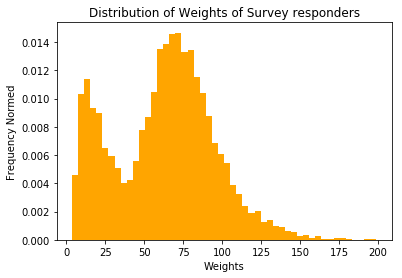

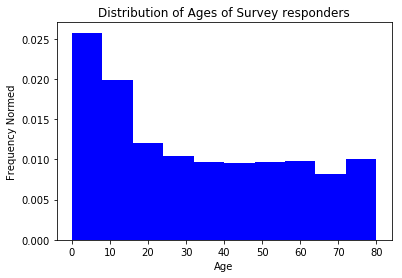

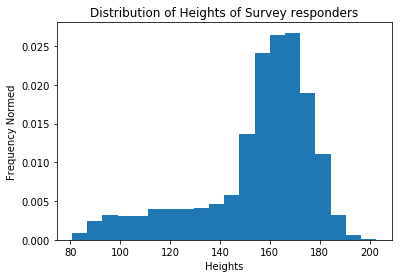

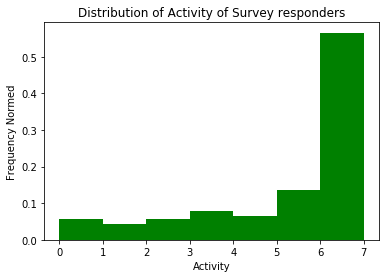

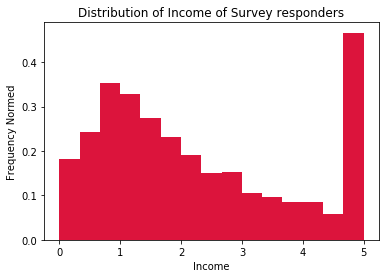

In [7]:
#Histogram of weights distribution
plt.figure()
plt.hist(weight, bins=50, histtype="bar", density=True, color="orange")
plt.xlabel("Weights")
plt.ylabel("Frequency Normed")
plt.title("Distribution of Weights of Survey responders")
plt.show()

#Histogram of ages distribution
plt.figure()
plt.hist(age, histtype="bar", density=True, color="blue")
plt.xlabel("Age")
plt.ylabel("Frequency Normed")
plt.title("Distribution of Ages of Survey responders")
plt.show()

#Histogram of heights distribution
plt.figure()
plt.hist(height, bins=20, histtype="bar", density=True)
plt.xlabel("Heights")
plt.ylabel("Frequency Normed")
plt.title("Distribution of Heights of Survey responders")
plt.show()

#Histogram of activity distribution
plt.figure()
plt.hist(activity, histtype="bar", bins=7, density=True, color="green")
plt.xlabel("Activity")
plt.ylabel("Frequency Normed")
plt.title("Distribution of Activity of Survey responders")
plt.show()

#Histogram of income distribution
plt.figure()
plt.hist(income, histtype="bar", bins=15, density=True, color="crimson")
plt.xlabel("Income")
plt.ylabel("Frequency Normed")
plt.title("Distribution of Income of Survey responders")
plt.show()

Because the data also has a categorical variable, which is the sex, and this definitely has some biological relation to weight, it is also important to check the distribution of the ages and heights of the sexes. We could use violin plots for studying this. A second histogram is also created, just for comparison to make sure that the written code was correct!

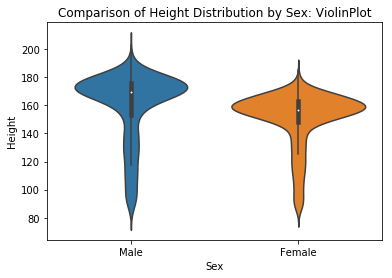

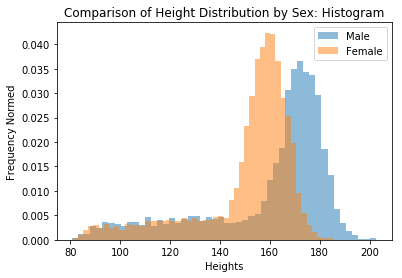

In [8]:
males_heights = excelica["Height"][excelica["Sex"] == "Male"].dropna()
females_heights = excelica["Height"][excelica["Sex"] == "Female"].dropna()

#Plotting a violinplot of sex vs height
plt.figure()
plt.title("Comparison of Height Distribution by Sex: ViolinPlot")
sns.violinplot(x=sex, y=height)
plt.show()

#Plotting a histogram of heights of males and females
plt.figure()
plt.title("Comparison of Height Distribution by Sex: Histogram")
plt.hist(males_heights, bins=50, density=True, alpha=0.5)
plt.hist(females_heights, bins=50, density=True, alpha=0.5)
plt.xlabel("Heights")
plt.ylabel("Frequency Normed")
plt.legend(["Male", "Female"])
plt.show()

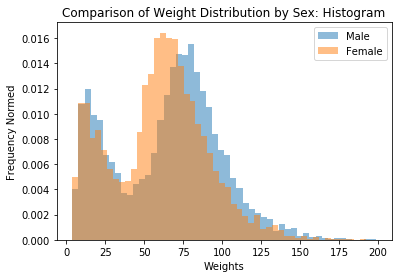

1164.442382680258
919.8448008664701


In [9]:
males_weights = excelica["Weight"][excelica["Sex"] == "Male"].dropna()
females_weights = excelica["Weight"][excelica["Sex"] == "Female"].dropna()

#Plotting a histogram of heights of males and females
plt.figure()
plt.title("Comparison of Weight Distribution by Sex: Histogram")
plt.hist(males_weights, bins=50, density=True, alpha=0.5)
plt.hist(females_weights, bins=50, density=True, alpha=0.5)
plt.xlabel("Weights")
plt.ylabel("Frequency Normed")
plt.legend(["Male", "Female"])
plt.show()

#print(males_weights.mean())
#print(females_weights.mean())
print(males_weights.var())
print(females_weights.var())

Looking at this data, we can see that the height distribution is fairly similar between males and females.The mean height of males appears to be greater than females. We can check if there is a significant difference between the mean male and female heights using an ANOVA test.

In [10]:
#Importing ANOVA test from scipy.stats module
from scipy.stats import f_oneway

In order to do an ANOVA, it was required that the rows of male and female heights that stored null values be dropped.

In [11]:
#Performing ANOVA to compare mean heights of males and females
fstat, pval = f_oneway(males_heights, females_heights)
print("H0: µ of male heights = µ of female heights")
print("H1: µ of male heights != µ of female heights")
print("p-value: " + str(pval))

H0: µ of male heights = µ of female heights
H1: µ of male heights != µ of female heights
p-value: 6.945078927968088e-77


The p-value for the ANOVA comparing males and females heights is lesser than 0.05. Thus, we can reject the H0 and conclude that the males and females heights are different.

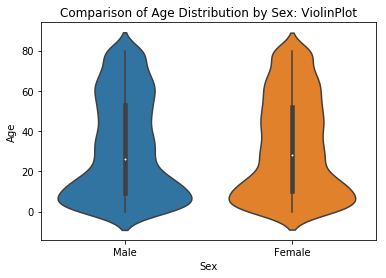

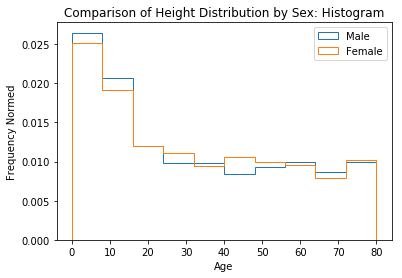

In [12]:
males_ages = excelica["Age"][excelica["Sex"] == "Male"]
females_ages = excelica["Age"][excelica["Sex"] == "Female"]

#Plotting a violinplot of sex vs height
plt.figure()
plt.title("Comparison of Age Distribution by Sex: ViolinPlot")
sns.violinplot(x=sex, y=age)
plt.show()

#Plotting a histogram of heights of males and females
plt.figure()
plt.title("Comparison of Height Distribution by Sex: Histogram")
plt.hist(males_ages, bins=10, density=True, histtype="step",alpha=1)
plt.hist(females_ages, bins=10, density=True, histtype="step", alpha=1)
plt.xlabel("Age")
plt.ylabel("Frequency Normed")
plt.legend(["Male", "Female"])
plt.show()

For this data as well, the ages of males and females involved in this survey are very similar. We can conduct another ANOVA to compare the mean age of the male and female populations.

In [13]:
#Performing ANOVA to compare mean age of males and females
fstat, pval = f_oneway(males_ages, females_ages)
print("H0: µ of male ages = µ of female ages")
print("H1: µ of male ages != µ of female ages")
print("p-value: " + str(pval))

H0: µ of male ages = µ of female ages
H1: µ of male ages != µ of female ages
p-value: 0.2753076368161057


The p-value is greater than 0.05, hence we do not reject the null hypothesis and thus conclude that the male and female mean ages are similar.

In [14]:
#Performing ANOVA to compare mean weights of males and females
fstat, pval = f_oneway(males_weights, females_weights)
print("H0: µ of male weights = µ of female weights")
print("H1: µ of male weights != µ of female weights")
print("p-value: " + str(pval))

H0: µ of male weights = µ of female weights
H1: µ of male weights != µ of female weights
p-value: 2.2773980525829765e-17


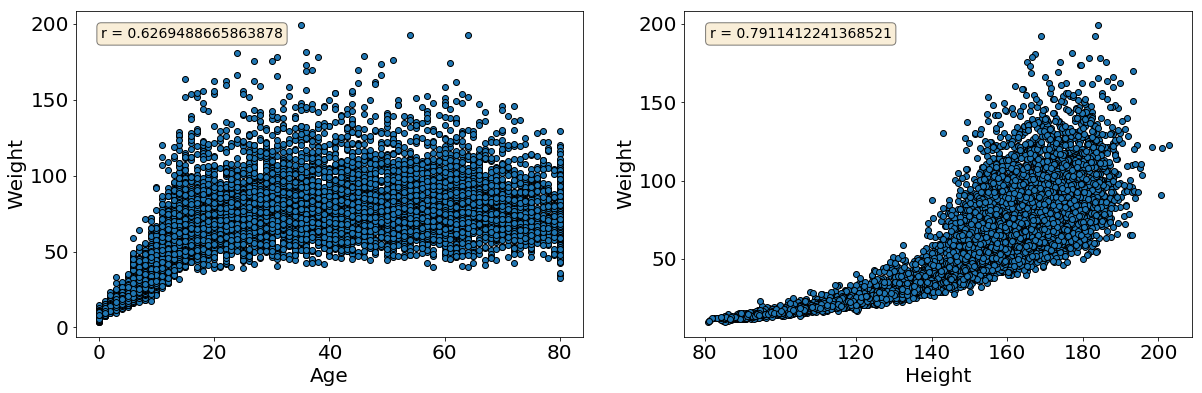

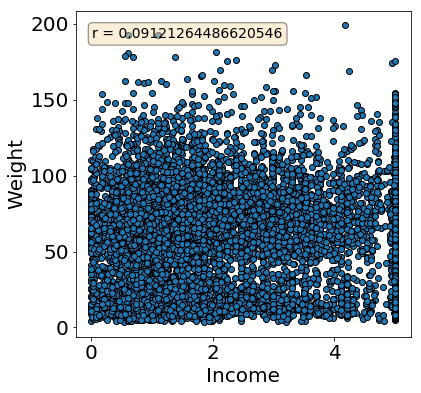

In [16]:
def scatterplot_maker(rows, columns, X, X_labels, y, y_label):
    fig = plt.figure(figsize=[20,6])
    plt.rcParams.update({'font.size':20})
    for i in range(columns):
        ax = plt.subplot(rows, columns, i+1)
        plt.scatter(X[i], y, edgecolors='black', linewidth=1)
        plt.xlabel(X_labels[i])
        plt.ylabel(y_label)
        text = 'r = ' + str(X[i].corr(y))
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
        plt.savefig('corr2.png')
    plt.show()

X = [age, height]
X_labels = ['Age', 'Height']
y = weight
y_label = 'Weight'
scatterplot_maker(rows=1, columns=2, X=X, y=y, X_labels=X_labels, y_label=y_label)

plt.figure(figsize=[6, 6])
ax = plt.subplot()
plt.scatter(income, weight, edgecolors='black', linewidth=1)
plt.xlabel('Income')
plt.ylabel('Weight')
text = 'r = ' + str(income.corr(weight))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=14,
verticalalignment='top', bbox=props)
plt.show()

# Linear Regression Analysis

In [17]:
excelica_cleaned = excelica.drop(columns = "Activity")
excelica_cleaned.head()
excelica_cleaned.dropna()
excelica_cleaned.isna().any()

Weight     True
Age       False
Height     True
Income     True
Sex       False
dtype: bool

In [18]:
features = ["Age", "Height", "Income"]
X = excelica[features]
y = excelica["Weight"]
X.isna().any()

Age       False
Height     True
Income     True
dtype: bool

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [21]:
weight_predictor = LinearRegression()
weight_predictor.fit(x_train, y_train)
weight_predictor.coef_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').